<a href="https://colab.research.google.com/github/vinigoia/Analise-dos-Dados-do-Airbnb/blob/main/14_Projeto_01_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Roma*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Roma, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv ("/content/gdrive/MyDrive/Colab Notebooks/02 - Data Science na Prática/Projeto 01 - Arquivos/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - Identificação Airbnb
* `name` - Nome do anúncio 
* `host_id` - Identificação Airbnb do proprietário
* `host_name` - Nome do proprietário
* `neighbourhood_group` - Coluna com  dados ausentes
* `neighbourhood` - Bairro
* `latitude` - Coordenada latitude do local da propriedade
* `longitude` - Coordenada longitude do local da propriedade
* `room_type` - Tipo de quarto ofertado
* `price` - Preço da diária na moeda local
* `minimum_nights` - Número mínimo de noites permitidas
* `number_of_reviews` - Número de avaliações
* `last_review` - Última avaliação
* `reviews_per_month` - Número de avaliações por mês
* `calculated_host_listings_count` - Quantidade de propriedades listadas pelo proprietário
* `availability_365` - Disponibilidade de dias para o ano
* `number_of_reviews_ltm` - Número de reviews nos últimos 12 meses
* `license` - Número da Licensa / Registro / Permissão

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,49955080,Singola al Casale di Gardenia,396326393,Alessia,NaN,XV Cassia/Flaminia,42.07605,12.32067,Private room,66,1,0,NaN,NaN,3,88,0,NaN
1,41146116,Il Giardino di Veio,322089651,Rosetta,NaN,XV Cassia/Flaminia,42.05088,12.45619,Private room,20,2,1,2020-01-26,0.03,1,0,0,NaN
2,39624404,CAMERA MATRIMONIALE STANDARD CON COLAZIONE INC...,304471512,Hotel,NaN,VI Roma delle Torri,41.82882,12.73900,Private room,100,1,0,NaN,NaN,1,180,0,NaN
3,1903817,Lovely apartment with fabulous view north of Rome,9883614,Eva,NaN,XV Cassia/Flaminia,42.13578,12.32621,Entire home/apt,110,3,53,2022-05-25,0.63,4,289,3,NaN
4,17617868,SUPER OFFERTA-stanza Maria-doppia o matrimoniale,97622372,Eleonora,NaN,XV Cassia/Flaminia,42.06512,12.46106,Private room,25,1,12,2022-05-17,0.19,3,315,3,16903


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
df.info()

# verificar as 5 primeiras entradas do dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911 entries, 0 to 23910
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23911 non-null  int64  
 1   name                            23908 non-null  object 
 2   host_id                         23911 non-null  int64  
 3   host_name                       23906 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   23911 non-null  object 
 6   latitude                        23911 non-null  float64
 7   longitude                       23911 non-null  float64
 8   room_type                       23911 non-null  object 
 9   price                           23911 non-null  int64  
 10  minimum_nights                  23911 non-null  int64  
 11  number_of_reviews               23911 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,49955080,Singola al Casale di Gardenia,396326393,Alessia,NaN,XV Cassia/Flaminia,42.07605,12.32067,Private room,66,1,0,NaN,NaN,3,88,0,NaN
1,41146116,Il Giardino di Veio,322089651,Rosetta,NaN,XV Cassia/Flaminia,42.05088,12.45619,Private room,20,2,1,2020-01-26,0.03,1,0,0,NaN
2,39624404,CAMERA MATRIMONIALE STANDARD CON COLAZIONE INC...,304471512,Hotel,NaN,VI Roma delle Torri,41.82882,12.73900,Private room,100,1,0,NaN,NaN,1,180,0,NaN
3,1903817,Lovely apartment with fabulous view north of Rome,9883614,Eva,NaN,XV Cassia/Flaminia,42.13578,12.32621,Entire home/apt,110,3,53,2022-05-25,0.63,4,289,3,NaN
4,17617868,SUPER OFFERTA-stanza Maria-doppia o matrimoniale,97622372,Eleonora,NaN,XV Cassia/Flaminia,42.06512,12.46106,Private room,25,1,12,2022-05-17,0.19,3,315,3,16903


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
df.isnull().sum().sort_values(ascending=False) / df.shape[0]

neighbourhood_group               1.000000
license                           0.852620
reviews_per_month                 0.164820
last_review                       0.164820
host_name                         0.000209
name                              0.000125
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

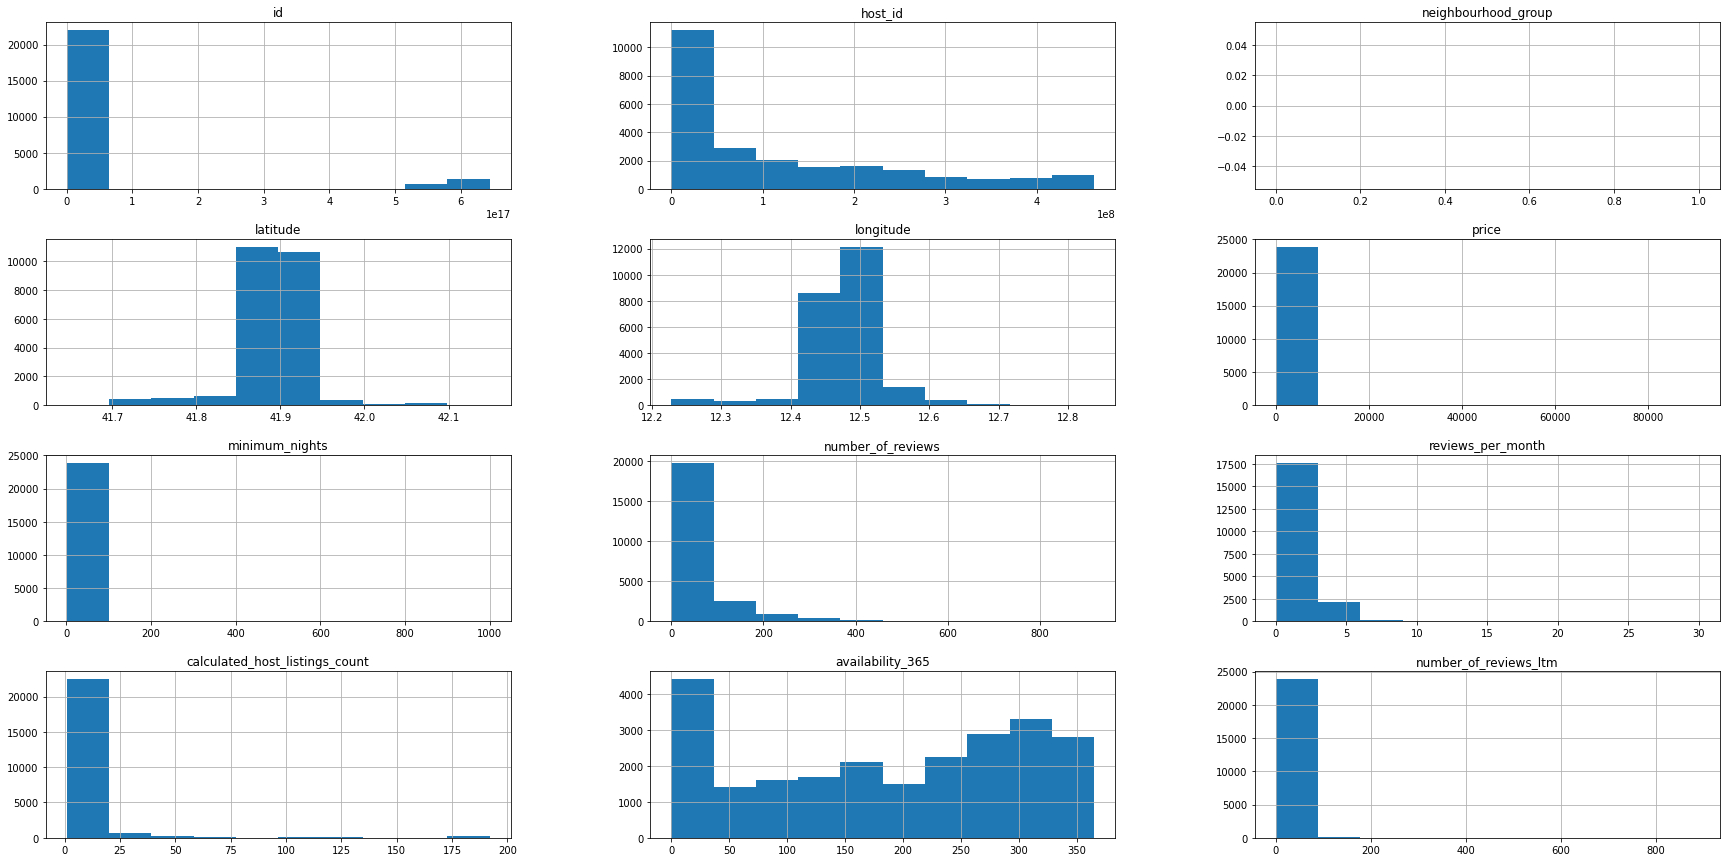

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(figsize=[30,15]);

#### Alguns Insights retirados dos gráficos

* Pela região de frequência da latitude e longitude, percebe-se uma concentração de ofertas em uma localidade específica;

* A maioria dos proprietários tem mais de uma oferta de quarto;

* Pelo número de review por mês, percebe-se que a maioria dos proprietários alugam menos que 5 vezes no mês, o que justifica ter mais de uma propriedade.


### **Q4. Qual a média dos preços de aluguel?**

In [7]:
df['price'].describe()

count    23911.000000
mean       166.658107
std        846.356788
min          0.000000
25%         65.000000
50%        100.000000
75%        157.000000
max      90963.000000
Name: price, dtype: float64

In [8]:
# ver a média da coluna `price``
df['price'].mean()

166.65810714733806

### **Q4. Qual a correlação existente entre as variáveis**

In [9]:
# criar uma matriz de correlação
df_corr = df.corr()

# mostrar a matriz de correlação
df_corr

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.221591,NaN,0.006471,-0.007160,0.000269,-0.018950,-0.169373,0.260983,0.067983,0.133579,-0.118317
host_id,0.221591,1.000000,NaN,-0.027355,-0.014828,0.022291,-0.032401,-0.256695,0.088181,-0.082378,0.063263,-0.033749
neighbourhood_group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.006471,-0.027355,NaN,1.000000,0.259004,0.015548,0.001196,0.022054,0.026975,0.019406,0.016108,0.027083
longitude,-0.007160,-0.014828,NaN,0.259004,1.000000,-0.014892,0.004301,0.021386,0.015243,0.003236,-0.027202,0.008602
price,0.000269,0.022291,NaN,0.015548,-0.014892,1.000000,-0.002710,-0.027109,-0.014006,0.030761,0.004872,-0.019655
minimum_nights,-0.018950,-0.032401,NaN,0.001196,0.004301,-0.002710,1.000000,-0.023117,-0.041683,-0.021922,0.005600,-0.046990
number_of_reviews,-0.169373,-0.256695,NaN,0.022054,0.021386,-0.027109,-0.023117,1.000000,0.571470,-0.050331,-0.001884,0.577055
reviews_per_month,0.260983,0.088181,NaN,0.026975,0.015243,-0.014006,-0.041683,0.571470,1.000000,-0.002250,0.078357,0.691049
calculated_host_listings_count,0.067983,-0.082378,NaN,0.019406,0.003236,0.030761,-0.021922,-0.050331,-0.002250,1.000000,-0.038447,-0.004177


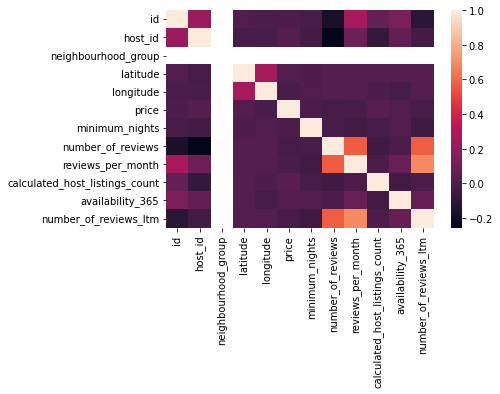

In [11]:
# plotar um heatmap a partir das correlações
sns.heatmap(df_corr)


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [12]:
# mostrar a quantidade de cada tipo de imóvel disponível
df['room_type'].value_counts()

Entire home/apt    15816
Private room        7122
Hotel room           823
Shared room          150
Name: room_type, dtype: int64

In [13]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df['room_type'].value_counts() / df.shape[0]

Entire home/apt    0.661453
Private room       0.297855
Hotel room         0.034419
Shared room        0.006273
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [17]:
# ver preços por bairros, na média
#df.iloc[:,5:10].drop(columns=['latitude','longitude','room_type'])
bairro = df[['neighbourhood','price']]

In [23]:
bairro.groupby(['neighbourhood']).mean().sort_values(['price'],ascending=False)

,price
neighbourhood,
XI Arvalia/Portuense,315.661538
I Centro Storico,205.766725
II Parioli/Nomentano,146.295732
XIII Aurelia,143.172439
XV Cassia/Flaminia,136.271222
IX Eur,118.437870
VII San Giovanni/Cinecittà,102.632836
XII Monte Verde,100.791139
X Ostia/Acilia,99.659446


In [57]:
df['neighbourhood'].value_counts()[1:16]

1675

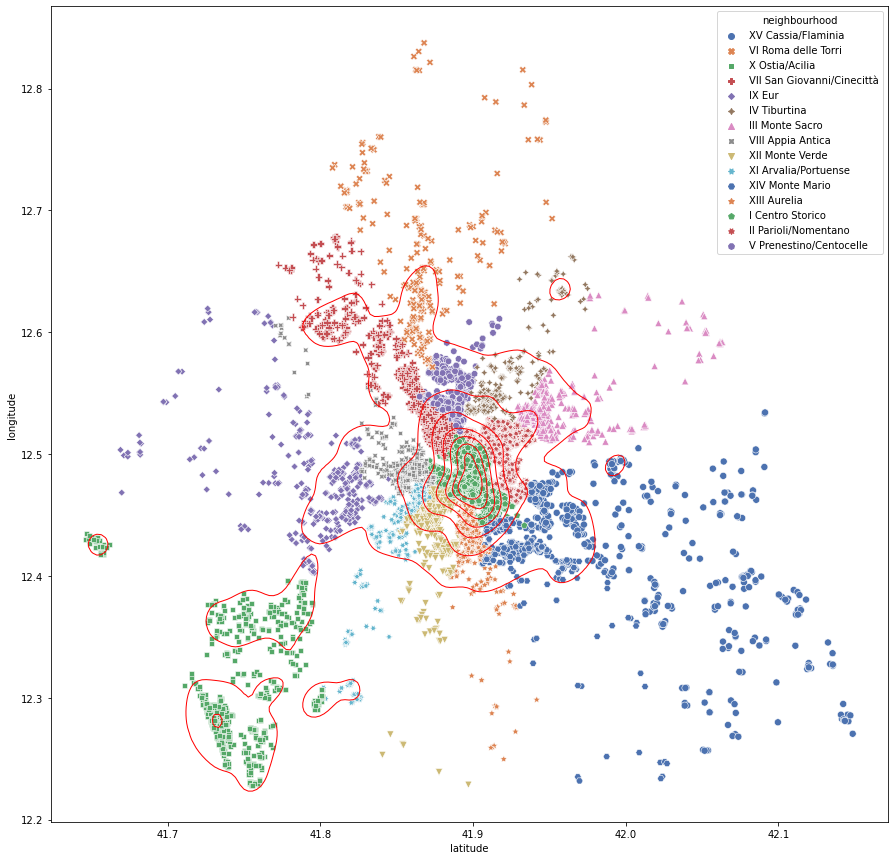

In [64]:
# plotar os imóveis pela latitude-longitude
f, ax = plt.subplots(figsize=(15, 15))
sns.scatterplot(x=df['latitude'], y=df['longitude'], s=50, hue = df['neighbourhood'], style=df['neighbourhood'],palette="deep")
#sns.histplot(x=df['latitude'], y=df['longitude'], bins=100, pthresh=.1, cmap="mako")
sns.kdeplot(x=df['latitude'], y=df['longitude'], levels=8, color="r", linewidths=1)

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [26]:
# ver a média da coluna `minimum_nights``
df['minimum_nights'].mean()

3.6504537660490985

## Conclusões


Percebe-se que a região central da cidade de Roma possui uma concentração maior de hotéis disponíveis para locação. Não necessariamente a grande demanda gera preços menores, pois nesssa região estão localizadas as ofertas mais caras. Provavelmente isso ocorre devido a área possuir os pontos turísticos mais famosos, o que agrega valor às atividades turísticas.

As regiões mais afastadas do centro possui preços menores, em média, e uma dispersão maior dos pontos disponíveis para locação.

Como mais da metade dos locais ofertados são do tipo casa completa/apartamento e a média do mínimo de noites para aluguel aproxima-se de 4, presume-se que o perfil da maioria dos clientes prefere uma estadia alongada, provavelmente próxima aos finais de semana, com o intuito de não apenas aproveitar os pontos turísticos como ter a opção de ter um conforto nos aposentos.

Apesar do grande número de localidades ofertadas pelo Airbnb, mais de 85% dos casos não possui licensa para a atividade, o que indica que a grande maioria dos locais provavelmente são casas ou quartos de pessoas comuns, que não necessariamente possuem um hotel ou praticam alguma atividade regularizada de hotelaria. Há pontos positivos e negativos com relação a este fato, dependendo do objetivo da locação. 

Portanto, conclui-se que, para uma cidade turística como Roma, as regiões centrais possuirão uma disponibilidade maior de hoteis para locação, porém os preços serão mais elevados devido aos pontos turísticos nas proximidades. Regiões afastadas terão preços menores, porém a disponibilidade também é menor e, considerando o número elevado de noites mínimas para aluguel, pode haver dificuldade no encontro de um local apropriado.
 